# About dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).

**About this file**

Information about dataset attributes -

- Pregnancies: To express the Number of pregnancies
- Glucose: To express the Glucose level in blood
- BloodPressure: To express the Blood pressure measurement
- SkinThickness: To express the thickness of the skin
- Insulin: To express the Insulin level in blood
- BMI: To express the Body mass index
- DiabetesPedigreeFunction: To express the Diabetes percentage
- Age: To express the age
- Outcome: To express the final result 1 is Yes and 0 is No

# EDA

In [1]:
# constants

LIGHT_GREEN = '#7bb078'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./../data/Diabetes-Data.csv')

In [4]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(2768, 10)

In [6]:
df['Id'].nunique()

2768

There is only 1 record per person

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


# Feature Engineering

In [8]:
import pandas as pd

# Assuming 'age' is your column with ages
bins = [0, 12, 19, 29, 39, 49, 64, 100]
labels = ["Child", "Teenager", "Young Adult", "Adult", "Middle Aged", "Senior Adult", "Elderly"]

# Create a new column with the binned age groups
df['Age Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)


In [9]:
df['Age Category'].value_counts()

Age Category
Young Adult     1446
Adult            589
Middle Aged      428
Senior Adult     241
Elderly           64
Child              0
Teenager           0
Name: count, dtype: int64

## Univariate Analysis

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2768.0,1384.500000,799.197097,1.000,692.750,1384.500,2076.250,2768.00
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


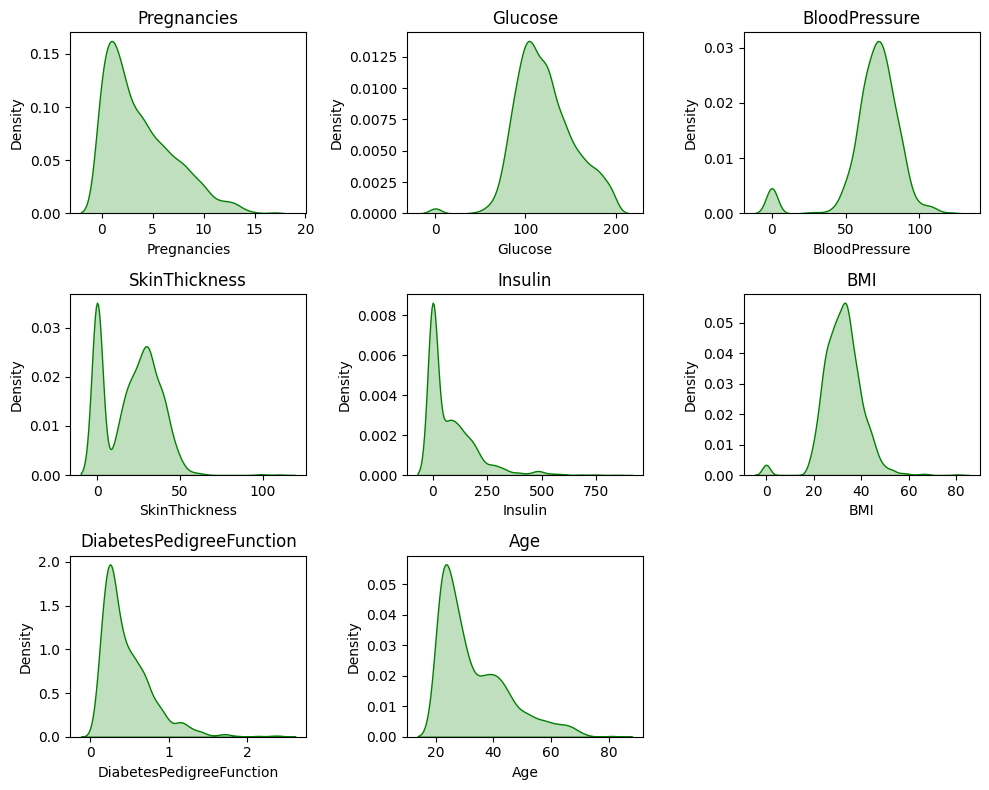

In [11]:
rows, cols = (3, 3)
plt.figure(figsize=(10, 8))

num_columns = df.select_dtypes(include=[np.number]).columns.tolist()

num_columns.remove('Outcome')
num_columns.remove('Id')

for i, col in enumerate(num_columns):
    plt.subplot(rows, cols, i+1)
    plt.title(col)
    sns.kdeplot(df[col], fill=True, color='g')

plt.tight_layout()
plt.show()

In [12]:
df.isna().sum().sum()

np.int64(0)

In [13]:
df.duplicated().sum()

np.int64(0)

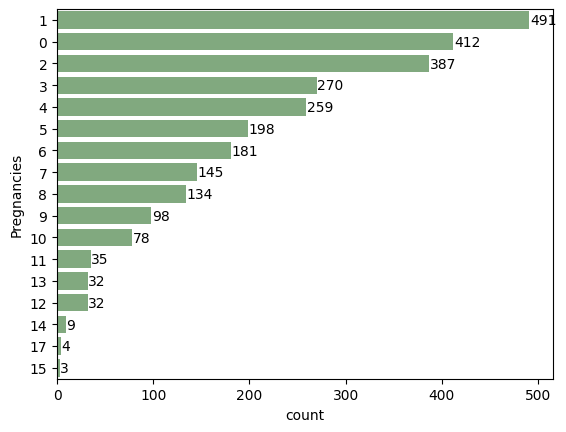

In [14]:
sns.countplot(y=df['Pregnancies'], order=df['Pregnancies'].value_counts().index, color=LIGHT_GREEN)

for p in plt.gca().patches:
    plt.text(p.get_width() + 0.5, p.get_y() + 0.6, str(round(p.get_width())), color='black')

plt.show()

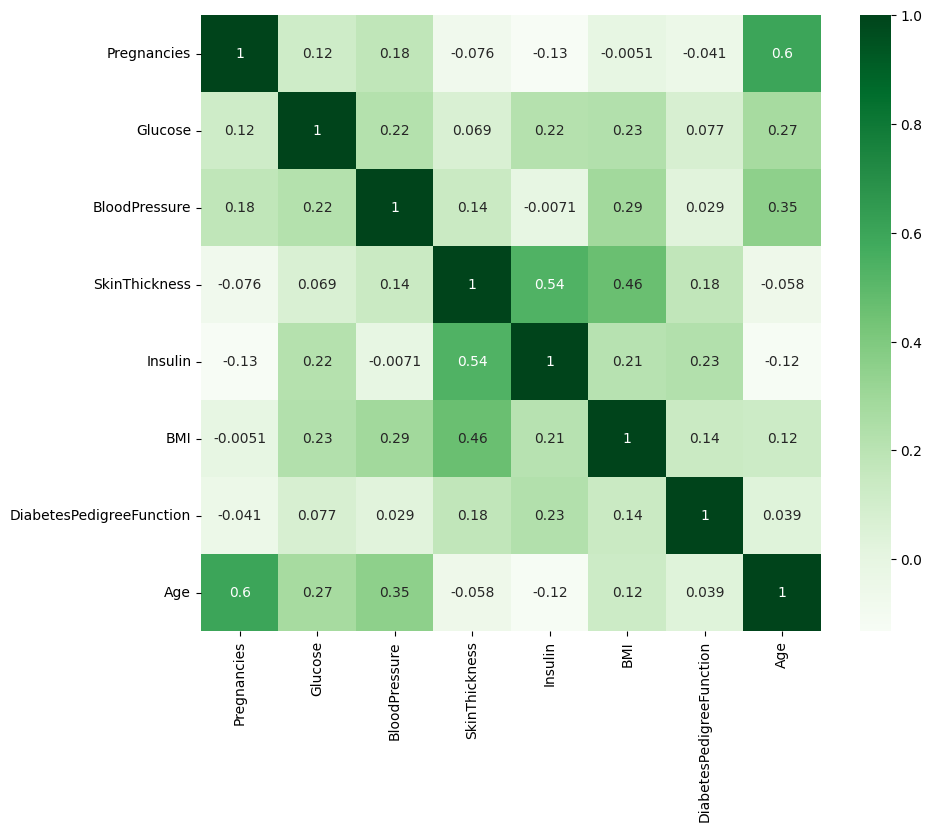

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_columns].corr(method='spearman'), annot=True, cmap='Greens')
plt.show()

There is no significant correlation observed among the variables

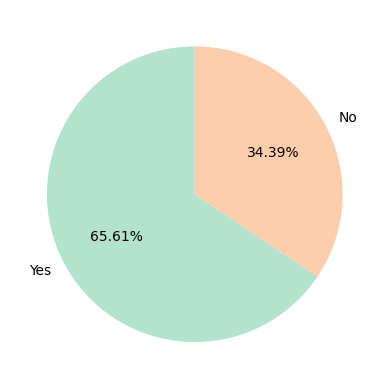

In [16]:
plt.pie(df['Outcome'].value_counts(), labels=['Yes', 'No'], autopct='%1.2f%%', colors=plt.get_cmap('Pastel2').colors, startangle=90)
plt.show()

## Bivariate Analysis

In [17]:
def probability_of_outcome_given_param(data, param_name, param_value, outcome):
  """
  Calculate the probability of an outcome given the parameter.

  Args:
    data: The dataset.
    param_name: The name of the parameter.
    param_value: The value of the parameter.
    outcome: The outcome (0 or 1).

  Returns: Probability of the outcome given the parameter.

  """
  # Get the subset
  subset_pregnancies = data[(data[param_name] == param_value)]
  subset_outcome = data[data['Outcome'] == outcome]

  # Calculate prior
  prior = subset_outcome.shape[0] / data.shape[0]

  # Calculate likelihood
  likelihood = subset_outcome[subset_outcome[param_name] == param_value].shape[0] / subset_outcome.shape[0]

  # Calculate Marginal
  marginal = subset_pregnancies.shape[0] / data.shape[0]

  # Calculate Posterior
  posterior = prior * likelihood / marginal

  return posterior

In [18]:
for pregnancy in df['Pregnancies'].sort_values().unique():
  print(f'P(Diabetic | Pregnancy = {pregnancy}) = {probability_of_outcome_given_param(df, "Pregnancies", pregnancy, 1):.2f}')
  print(f'P(Not Diabetic | Pregnancy = {pregnancy}) = {probability_of_outcome_given_param(df, "Pregnancies", pregnancy, 0):.2f}')
  print('')

P(Diabetic | Pregnancy = 0) = 0.33
P(Not Diabetic | Pregnancy = 0) = 0.67

P(Diabetic | Pregnancy = 1) = 0.22
P(Not Diabetic | Pregnancy = 1) = 0.78

P(Diabetic | Pregnancy = 2) = 0.17
P(Not Diabetic | Pregnancy = 2) = 0.83

P(Diabetic | Pregnancy = 3) = 0.36
P(Not Diabetic | Pregnancy = 3) = 0.64

P(Diabetic | Pregnancy = 4) = 0.35
P(Not Diabetic | Pregnancy = 4) = 0.65

P(Diabetic | Pregnancy = 5) = 0.37
P(Not Diabetic | Pregnancy = 5) = 0.63

P(Diabetic | Pregnancy = 6) = 0.33
P(Not Diabetic | Pregnancy = 6) = 0.67

P(Diabetic | Pregnancy = 7) = 0.56
P(Not Diabetic | Pregnancy = 7) = 0.44

P(Diabetic | Pregnancy = 8) = 0.56
P(Not Diabetic | Pregnancy = 8) = 0.44

P(Diabetic | Pregnancy = 9) = 0.61
P(Not Diabetic | Pregnancy = 9) = 0.39

P(Diabetic | Pregnancy = 10) = 0.41
P(Not Diabetic | Pregnancy = 10) = 0.59

P(Diabetic | Pregnancy = 11) = 0.63
P(Not Diabetic | Pregnancy = 11) = 0.37

P(Diabetic | Pregnancy = 12) = 0.44
P(Not Diabetic | Pregnancy = 12) = 0.56

P(Diabetic | Pregna

**Observations:**
- Females with 0 to 6 pregnancies has less changes of getting diabetes
- If a female has 14, 15 or 17 pregnancies, she will be diabetic and her changes of diabetic is high



In [19]:
def categorize_blood_pressure(diastolic):
    if diastolic < 60:
        return "Hypotension"
    elif diastolic < 80:
        return "Normal"
    elif 80 <= diastolic <= 89:
        return "Hypertension Stage 1"
    elif 90 <= diastolic <= 120:
        return "Hypertension Stage 2"
    elif diastolic > 120:
        return "Hypertensive Crisis"

In [20]:
df['Blood Pressure Category'] = df['BloodPressure'].apply(categorize_blood_pressure)

In [21]:
df['Blood Pressure Category'].value_counts()

Blood Pressure Category
Normal                  1609
Hypertension Stage 1     521
Hypotension              431
Hypertension Stage 2     203
Hypertensive Crisis        4
Name: count, dtype: int64

In [22]:
categories = ['Hypotension', 'Normal', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis']
for category in categories:
  print(f'P(Diabetic | Blood Pressure is "{category}") = {probability_of_outcome_given_param(df, "Blood Pressure Category", category, 1):.2f}')
  print(f'P(Not Diabetic | Blood Pressure is "{category}") = {probability_of_outcome_given_param(df, "Blood Pressure Category", category, 0):.2f}')
  print('')

P(Diabetic | Blood Pressure is "Hypotension") = 0.25
P(Not Diabetic | Blood Pressure is "Hypotension") = 0.75

P(Diabetic | Blood Pressure is "Normal") = 0.33
P(Not Diabetic | Blood Pressure is "Normal") = 0.67

P(Diabetic | Blood Pressure is "Hypertension Stage 1") = 0.43
P(Not Diabetic | Blood Pressure is "Hypertension Stage 1") = 0.57

P(Diabetic | Blood Pressure is "Hypertension Stage 2") = 0.48
P(Not Diabetic | Blood Pressure is "Hypertension Stage 2") = 0.52

P(Diabetic | Blood Pressure is "Hypertensive Crisis") = 0.00
P(Not Diabetic | Blood Pressure is "Hypertensive Crisis") = 1.00



**Observations:**
- The probability of being diabetic generally increases as blood pressure moves from "Hypotension" (low blood pressure) to "Hypertension Stage 2 (High blood pressure)."
- Interestingly, in the "Hypertensive Crisis" category, the probability of being diabetic is 0.00. This may be due to having only 4 data points in this category. With more data points, we could make a more accurate prediction.

In [23]:
mask = (df['Pregnancies'] == 14) | (df['Pregnancies'] == 15) | (df['Pregnancies'] == 17)
df[mask]['Blood Pressure Category'].value_counts().reset_index()

,Blood Pressure Category,count
0,Normal,16


**Observation:** Females with 14, 15 or 17 pregnancies who has probability of being diabetic 1 has normal blood pressure